<div align="center">
<font size="6"> Fetal Health Classification with Keras  </font>  
</div> 


<div align="center">
<font size="4"> Context  </font>  
</div> 

Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress. The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

<div align="center">
<font size="4"> Data  </font>  
</div> 

This dataset contains **2126 records** of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into **3 classes**:

- Normal
- Suspect
- Pathological

Link to dataset is [here](https://www.kaggle.com/andrewmvd/fetal-health-classification).

<h2 style=color:Teal align="left"> Table of Contents </h2>

### 1 Import packages
#### 1.1 Kaggle and other imports
#### 1.2 Visuzalization imports
#### 1.3 Import Scikit-Learn
#### 1.4 Import Keras
### 2 Configs
### 3 Dataset
#### 3.1 Class imbalance
#### 3.2 Data split
#### 3.3 Class weights
#### 3.4 Convert to arrays for Keras
### 4 Model
#### 4.1 Build model
#### 4.2 Train and evalute model

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 1 Import packages </h1>

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 1.1 Kaggle and other imports </h1>

In [1]:
import os
import gc
import time
import tqdm
import random

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fetal-health-classification/fetal_health.csv


<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 1.2 Visualization imports </h1>

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

import warnings
warnings.filterwarnings('ignore')

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 1.3 Import Scikit-Learn </h1>

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler, LabelEncoder

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 1.4 Import Keras </h1>

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 2 Configs </h1>

In [5]:
SEED = 123      
random.seed(SEED)

TEST_SIZE = 0.20
VAL_SIZE = 0.15

EPOCHS = 100
BATCH_SIZE = 4

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 3 Dataset </h1>

In [6]:
data = pd.read_csv("/kaggle/input/fetal-health-classification/fetal_health.csv")

In [7]:
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 3.1 Class imbalance </h1>

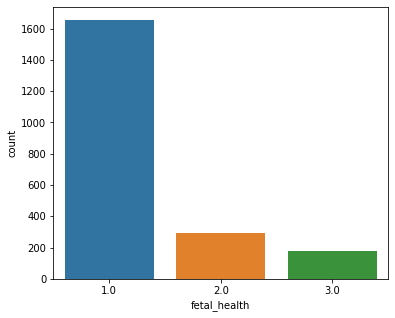

In [8]:
plt.figure(figsize=(6,5))
ax = sns.countplot(x = data['fetal_health'])

#1-Normal
#2-Suspect
#3-Pathological

In [9]:
label = LabelEncoder()
label.fit(data['fetal_health'])
data['fetal_health'] = label.transform(data['fetal_health'])

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 3.2 Data split </h1>

In [10]:
print('\nData split:\nTest size: {}\nVal  size: {}\n'.format(TEST_SIZE,VAL_SIZE))
X = data.drop(columns='fetal_health')
y = data['fetal_health']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, 
                                                    test_size = TEST_SIZE, 
                                                    random_state=SEED)

print('TRAIN: {} & {}'.format(X_train.shape, y_train.shape))
print('TEST:  {} & {}'.format(X_test.shape, y_test.shape))

val_len = int(X_train.shape[0]*VAL_SIZE)


Data split:
Test size: 0.2
Val  size: 0.15

TRAIN: (1700, 21) & (1700,)
TEST:  (426, 21) & (426,)


In [11]:
n_features = len(X_train.columns)
n_features

21

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 3.3 Class weights </h1>

In [12]:
# Calculate class weights from sklearn
class_weight_array = class_weight.compute_class_weight('balanced', 
                                                       np.unique(y_train), 
                                                       y_train)
print('\nClass weights: {}'.format(class_weight_array)) 

# Class weights as dictionary for Keras
keys = [0,1,2] 
class_weight_dict = dict(zip(keys, class_weight_array.T))
print('\nClass weights dict: {}'.format(class_weight_dict))


Class weights: [0.42831948 2.40112994 4.01891253]

Class weights dict: {0: 0.42831947593852354, 1: 2.401129943502825, 2: 4.0189125295508275}


<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 3.4 Convert to arrays for Keras </h1>

In [13]:
X_train = X_train.values
X_test = X_test.values

y_train = y_train.values
y_test = y_test.values

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 4 Model </h1>

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 4.1 Build model </h1>

In [14]:
model_0 = Sequential()
model_0.add(Dense(128, activation='relu', input_dim = n_features ) )
model_0.add(Dense(32, activation='relu'))
model_0.add(Dense(8, activation='relu'))
model_0.add(Dense(3, activation='softmax'))

model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_dim = n_features ) )
model_1.add(Dense(16, activation='relu'))
model_1.add(Dense(3, activation='softmax'))

model_2 = Sequential()
model_2.add(Dense(256, activation='relu', input_dim = n_features ) )
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(3, activation='softmax'))

In [15]:
models = [model_0, model_1, model_2]

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 4.2 Train and evaluate model </h1>

Epoch 1/100
362/362 [==============================] - 2s 3ms/step - loss: 1.8977 - accuracy: 0.5719 - val_loss: 1.2584 - val_accuracy: 0.4275
Epoch 2/100
362/362 [==============================] - 1s 1ms/step - loss: 0.7052 - accuracy: 0.6991 - val_loss: 0.6643 - val_accuracy: 0.7333
Epoch 3/100
362/362 [==============================] - 0s 1ms/step - loss: 0.7307 - accuracy: 0.7156 - val_loss: 0.4910 - val_accuracy: 0.8157
Epoch 4/100
362/362 [==============================] - 1s 1ms/step - loss: 0.6746 - accuracy: 0.7560 - val_loss: 0.5585 - val_accuracy: 0.7843
Epoch 5/100
362/362 [==============================] - 1s 1ms/step - loss: 0.5558 - accuracy: 0.7823 - val_loss: 0.5223 - val_accuracy: 0.8039
Epoch 6/100
362/362 [==============================] - 1s 1ms/step - loss: 0.6708 - accuracy: 0.7567 - val_loss: 0.5754 - val_accuracy: 0.7961
Epoch 7/100
362/362 [==============================] - 0s 1ms/step - loss: 0.6166 - accuracy: 0.7762 - val_loss: 0.4913 - val_accuracy: 0.8157

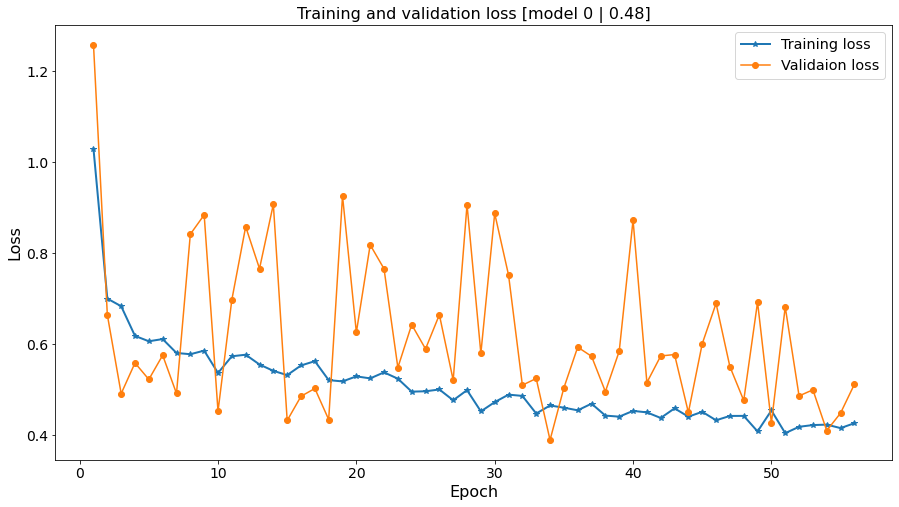

<Figure size 432x288 with 0 Axes>

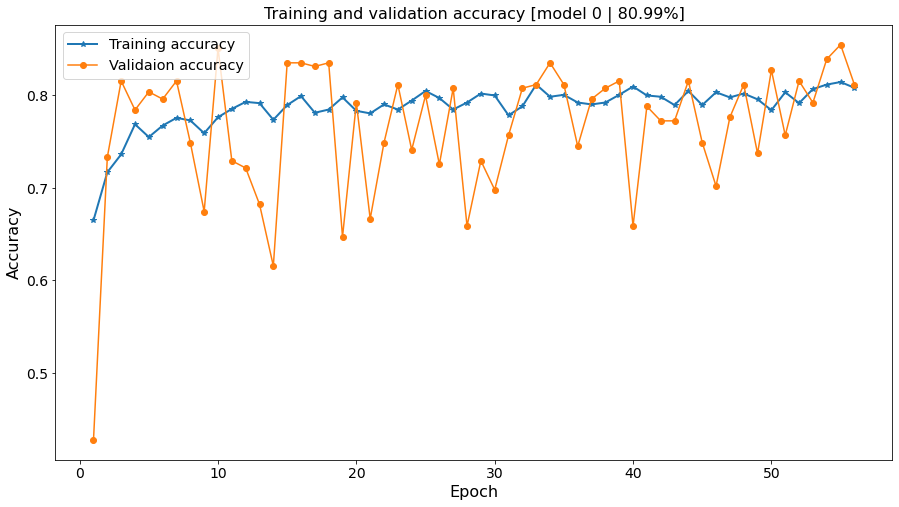

Epoch 1/100
362/362 [==============================] - 1s 2ms/step - loss: 11.6097 - accuracy: 0.4729 - val_loss: 1.1498 - val_accuracy: 0.7137
Epoch 2/100
362/362 [==============================] - 0s 1ms/step - loss: 1.6797 - accuracy: 0.6865 - val_loss: 1.2898 - val_accuracy: 0.6431
Epoch 3/100
362/362 [==============================] - 0s 1ms/step - loss: 1.4808 - accuracy: 0.6829 - val_loss: 1.0754 - val_accuracy: 0.7451
Epoch 4/100
362/362 [==============================] - 1s 1ms/step - loss: 1.1099 - accuracy: 0.6951 - val_loss: 1.2783 - val_accuracy: 0.5843
Epoch 5/100
362/362 [==============================] - 0s 1ms/step - loss: 1.1187 - accuracy: 0.6822 - val_loss: 2.7945 - val_accuracy: 0.2431
Epoch 6/100
362/362 [==============================] - 0s 1ms/step - loss: 1.0215 - accuracy: 0.6934 - val_loss: 0.8896 - val_accuracy: 0.7569
Epoch 7/100
362/362 [==============================] - 0s 1ms/step - loss: 1.8084 - accuracy: 0.6397 - val_loss: 1.8449 - val_accuracy: 0.556

<Figure size 432x288 with 0 Axes>

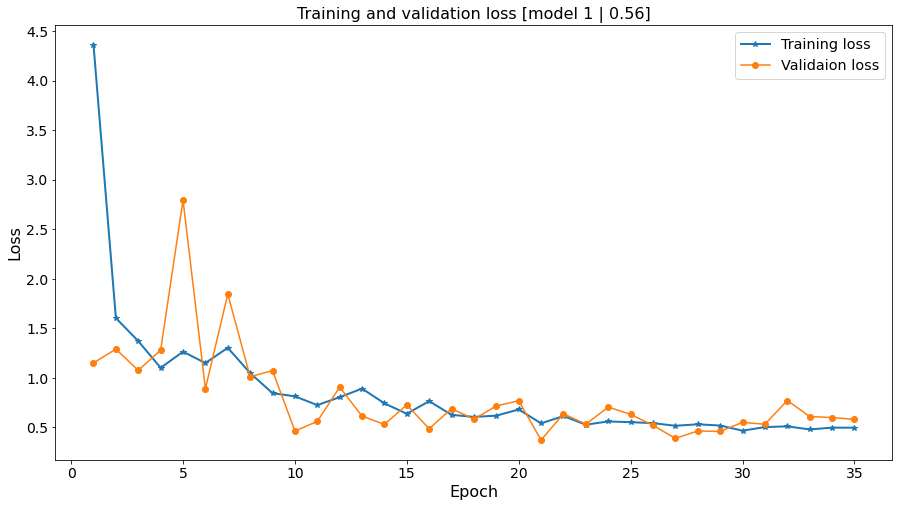

<Figure size 432x288 with 0 Axes>

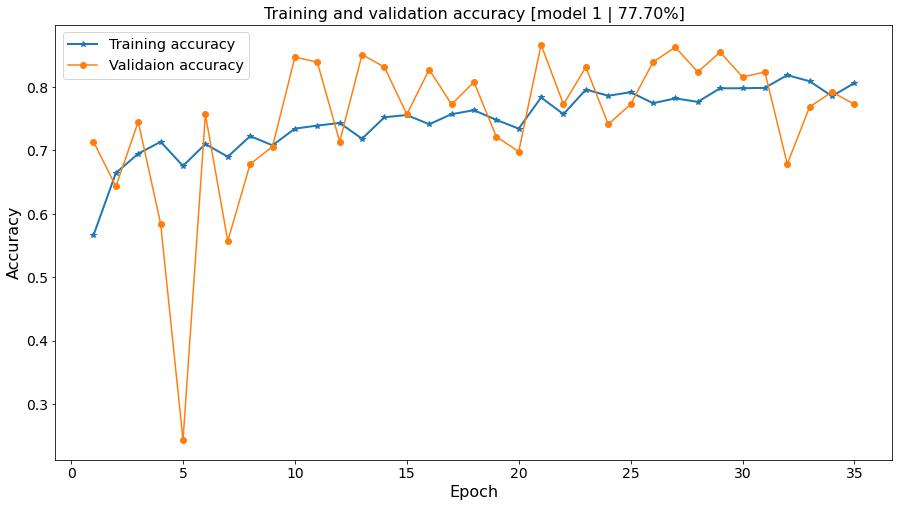

Epoch 1/100
362/362 [==============================] - 1s 2ms/step - loss: 8.9367 - accuracy: 0.4656 - val_loss: 5.4194 - val_accuracy: 0.2157
Epoch 2/100
362/362 [==============================] - 0s 1ms/step - loss: 2.2725 - accuracy: 0.6142 - val_loss: 2.7513 - val_accuracy: 0.7843
Epoch 3/100
362/362 [==============================] - 1s 1ms/step - loss: 2.2351 - accuracy: 0.6344 - val_loss: 2.0062 - val_accuracy: 0.2784
Epoch 4/100
362/362 [==============================] - 1s 1ms/step - loss: 1.0505 - accuracy: 0.6778 - val_loss: 0.5141 - val_accuracy: 0.8353
Epoch 5/100
362/362 [==============================] - 1s 1ms/step - loss: 0.8281 - accuracy: 0.7201 - val_loss: 0.5860 - val_accuracy: 0.7922
Epoch 6/100
362/362 [==============================] - 1s 1ms/step - loss: 0.6504 - accuracy: 0.7443 - val_loss: 0.6035 - val_accuracy: 0.7843
Epoch 7/100
362/362 [==============================] - 1s 1ms/step - loss: 0.6806 - accuracy: 0.6851 - val_loss: 1.1046 - val_accuracy: 0.6118

<Figure size 432x288 with 0 Axes>

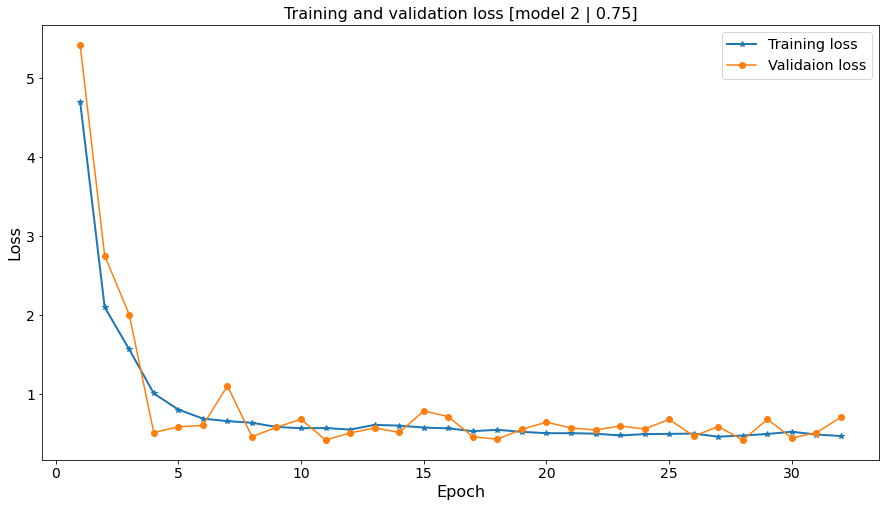

<Figure size 432x288 with 0 Axes>

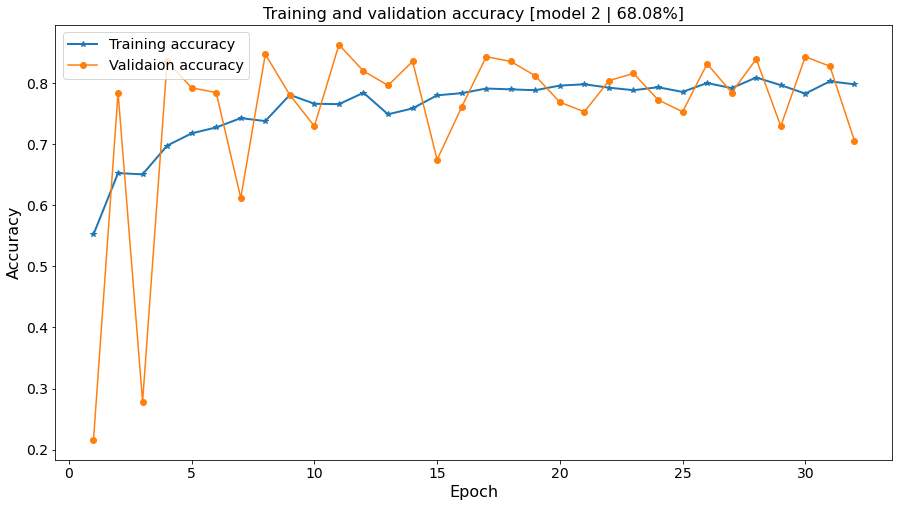

<Figure size 432x288 with 0 Axes>

In [16]:
for m,model in enumerate(models):
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
                 )

    X_val = X_train[:val_len]
    y_val = y_train[:val_len]

    X_train_cut = X_train[val_len:]
    y_train_cut = y_train[val_len:]
    
    # callback to stop the training if no improvement for 5 consecutive epochs
    callback = keras.callbacks.EarlyStopping(monitor='loss', 
                                             patience=5)

    history = model.fit(X_train_cut, y_train_cut, 
                        epochs=EPOCHS,
                        batch_size=BATCH_SIZE,
                        class_weight=class_weight_dict,
                        validation_data=(X_val, y_val),
                        callbacks=[callback],
                        #verbose=0
                       )
    
    result = model.evaluate(X_test, y_test)
    print('\nMODEL {}:\n{}'.format(m,result))

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    metrics = history.history['accuracy']
    epochs = range(1, len(metrics) + 1) 

    plt.figure(figsize=(15,8))
    plt.plot(epochs, loss, color='tab:blue', linestyle='-', linewidth=2, marker='*', label='Training loss')
    plt.plot(epochs, val_loss, color='tab:orange', linestyle='-', marker='o', label='Validaion loss')
    plt.title('Training and validation loss [model {} | {:.2f}]'.format(m,result[0]), fontsize=16)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.legend(loc='upper right', fontsize='x-large')
    plt.tick_params(labelsize=14)
    plt.show()
    plt.clf()
    
    plt.figure(figsize=(15,8))
    plt.plot(epochs, accuracy, color='tab:blue', linestyle='-', linewidth=2, marker='*', label='Training accuracy')
    plt.plot(epochs, val_accuracy, color='tab:orange', linestyle='-', marker='o', label='Validaion accuracy')
    plt.title('Training and validation accuracy [model {} | {:.2f}%]'.format(m,result[1]*100), fontsize=16)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Accuracy', fontsize=16)
    plt.legend(loc='upper left', fontsize='x-large')
    plt.tick_params(labelsize=14)
    plt.show()
    plt.clf()